In [149]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from compas_surrogate.cosmic_integration.universe import Universe


uni = Universe.from_compas_h5("/Users/avaj0001/Downloads/Z_all/COMPAS_Output.h5")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Average_SF_mass_needed =  512001475.7816289 solMass
Time taken for CI:  20.022253036499023


In [174]:
uni.save("uni.npz")

In [193]:
uni = Universe.from_npz("uni.npz")



In [195]:
uni

0.0215

In [15]:
def plot_detection_rate_matrix(uni):
    """ Plot the detection rate matrix """
    # get midpoints of redshift bins
    z = 0.5 * (uni.redshifts[:-1] + uni.redshifts[1:])
    mc = uni.COMPAS.mChirp
    detections = uni.detection_rate
    if (len(mc), len(z)) != detections.shape:
        raise ValueError(
            f"Shape of detection rate matrix ({detections.shape}) "
            f"does not match redshift and chirp mass bins ({len(z)}, {len(mc)})"
        )


plot_detection_rate_matrix(uni)

ValueError: Shape of detection rate matrix ((11735, 1000)) does not match redshift and chirp mass bins (10000, 11735)

In [21]:
z = 0.5 * (uni.redshifts[:-1] + uni.redshifts[1:])
mc = uni.COMPAS.mChirp
detections = uni.detection_rate
print(len(mc), len(z))

print(detections.shape)

11735 10000
(11735, 1000)


In [56]:
redshifts, COMPAS, detection_rate = uni.redshifts.copy(), uni.COMPAS, uni.detection_rate.copy()
redshifts = redshifts[redshifts<=1]
redshifts = 0.5 * (redshifts[:-1] + redshifts[1:])
print(f"Redshifts shape: {redshifts.shape}")
print(f"COMPS.mChirp shape: {COMPAS.mChirp.shape}")
print(f"Detection Rate shape: {detection_rate.shape}")

Redshifts shape: (1000,)
COMPS.mChirp shape: (11735,)
Detection Rate shape: (11735, 1000)


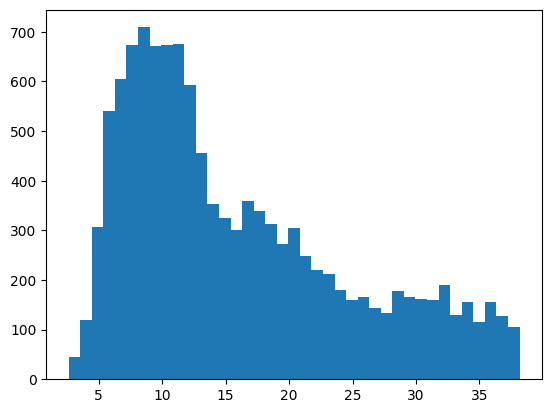

In [199]:
import matplotlib.pyplot as plt

chirp_masses = uni.dco_chirp_masses
_ = plt.hist(chirp_masses, bins=np.linspace(min(chirp_masses), max(chirp_masses), 40))

In [209]:
print(COMPAS.n_systems)
print(len(COMPAS.BBHmask))
print(len(COMPAS.BHNSmask))
print(len(COMPAS.CHE_BBHmask))
print(len(COMPAS.CHE_mask))
print(len(COMPAS.DCOmask))

#
# ['BBHmask',
#  'BHNSmask',
#  'CHE_BBHmask',
#  'CHE_mask',
#  'DCOmask',
#  'DNSmask',
#  'Hubble',
#  'Mlower',
#  'Mupper',
#  'NonCHE_BBHmask'

5000000
80123
80123
80123
80123
80123


In [ ]:
COMPAS

In [86]:
%matplotlib inline

In [92]:
from ipywidgets import interactive

def plot(i=0):
    plt.figure()
    plt.plot(redshifts, detection_rate[i, :], label=f"Mc: {mc[i]:.2f} Msol")
    plt.ylabel("Detection Rate")
    plt.xlabel("Redshift")
    plt.legend()
    return plt.gca()

interactive_plot = interactive(plot, i=(0, 1000))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=0, description='i', max=1000), Output(layout=Layout(height='350px'))), _…

In [216]:
from tqdm.auto import tqdm

array([ 3638,  5872,  8577, 11733,  7369,   708,  3914,  9472,  1442,
        2733,  2979,  8843,  4521,  9963,  7718,  5821,  9769,  3465,
       10673,  6363,  8777,  8113, 10837, 11060,  3585, 10397,  3912,
        7510,  5400,  3365,  5117,  4343, 10725,  5324,  8539,  2160,
        2224,  1043,  2698,  2661,  4934,  8461,  4705,  2274,  1003,
        4209,  9052, 10435,  6618,  7251, 10381,  7036, 10878,  2002,
         408,  9114,  3129,  6914,   328,  4397, 11151, 10188,  4355,
        2085,   950,  4446,  5396,  6159,  3851, 10123, 10338,  4101,
        9210,  9840,  9196,  1859,   669, 10960,  6170,  1909,  6969,
        9078,   587,  2392,  5959,  5034,   809,  8402, 10062,  2286,
        6069,   789,  5852,  6503,  8733,  5667,  6301,  1617,  9239,
        1503, 10029, 11261, 10731,  6703,  1008,    98,  4623,  7010,
       10776,  2242,  7921,  4329, 10275,  3404,  7034,  2519,  7174,
        7185])

  0%|          | 0/118 [00:00<?, ?it/s]

(0.0, 1.0)

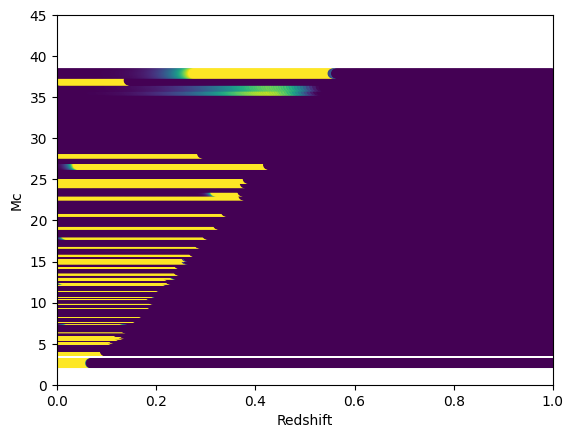

In [242]:
import matplotlib as mpl

plt.figure()

norm = mpl.colors.Normalize(vmin=np.exp(-80), vmax=np.exp(-40))

for i in tqdm(np.argsort(mc)[0::100]):
    x = redshifts
    y = [mc[i] for _ in range(len(x))]
    z = list(detection_rate[i, :])
    plt.scatter(x, y, c=z, norm=norm)
plt.ylabel("Mc")
plt.xlabel("Redshift")
plt.ylim(0, 45)
plt.xlim(0, 1)

/var/folders/qt/rxjvm_j566v9qn7g754s1v9hzb3p7f/T/ipykernel_35463/2662532800.py:1: RuntimeWarning: divide by zero encountered in log
  x = np.log(detection_rate.ravel())


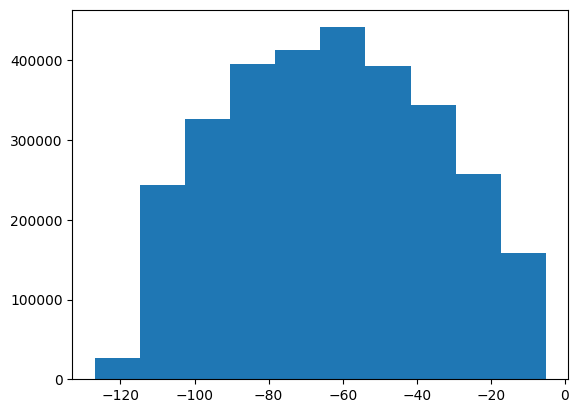

In [237]:
x = np.log(detection_rate.ravel())
x = x[x>-10000]

_ = plt.hist(x)

3.720075976020836e-44

In [220]:
sorted_mc

array([ 2.62493162,  2.63340936,  2.70996412, ..., 38.15917849,
       38.16024936, 38.16060978])

In [214]:
)

118

In [97]:
sorted_mc =sorted(mc)
mc_idx = np.argsort(mc)



array([12.6920303 , 31.93705489, 12.5056888 , ..., 14.43854332,
        4.94138285, 18.66262047])

In [108]:
arr = np.array([5, 4, 3,2,1,0])
list(arr[np.argsort(arr)])

[0, 1, 2, 3, 4, 5]

In [111]:
[mc[i] for _ in range(10)]

[38.160609781264746,
 38.160609781264746,
 38.160609781264746,
 38.160609781264746,
 38.160609781264746,
 38.160609781264746,
 38.160609781264746,
 38.160609781264746,
 38.160609781264746,
 38.160609781264746]